In [220]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [221]:
df  = pd.read_csv('salary_data_cleaned.csv')
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Average salary,company_txt,job_state,same_state,age,python,R,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\n,NM,0,48,1,1,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\n,MD,0,37,1,1,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\n,FL,1,11,1,1,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL\n,WA,1,56,1,1,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions\n,NY,1,23,1,1,0,0,1


In [222]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'Employer Provided', 'min_salary', 'max_salary',
       'Average salary', 'company_txt', 'job_state', 'same_state', 'age',
       'python', 'R', 'spark', 'aws', 'excel'],
      dtype='object')

In [223]:
df .columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'Employer Provided', 'min_salary', 'max_salary',
       'Average salary', 'company_txt', 'job_state', 'same_state', 'age',
       'python', 'R', 'spark', 'aws', 'excel'],
      dtype='object')

In [224]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr' in title.lower():
        return 'jr'
    else:
        return 'na'
    

In [225]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [226]:
df.job_simp.value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
mle                22
manager            22
director           14
Name: job_simp, dtype: int64

In [227]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

In [228]:
#fix state Los Angles
df['job_state'] = df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df.job_state.value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
WI     10
UT     10
IN     10
MO      9
AZ      9
AL      8
GA      6
KY      6
MI      6
DE      6
IA      5
CT      5
LA      4
OR      4
NE      4
NM      3
KS      3
MN      2
ID      2
RI      1
SC      1
Name: job_state, dtype: int64

In [229]:
#job description length
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0       2536
1       4783
2       3461
3       3883
4       2728
5       3747
6       1786
7       3804
8       1538
9       4574
10      2757
11      3490
12      3934
13      4897
14      3731
15      1889
16      3639
17      4163
18      3512
19      4397
20      2918
21      6909
22      6408
23      2907
24      3760
25      3698
26      4420
27      4900
28      5015
29      3461
30      3883
31      3342
32      5045
33      2327
34      2161
35      1739
36      5000
37      3703
38      3555
39      1739
40      3053
41      1996
42      3833
43      3550
44      9120
45      3213
46      7286
47      3412
48      2682
49      2739
50      2915
51      4244
52      1629
53      4734
54      4448
55      3543
56      4203
57      5020
58      1786
59      3747
60      4804
61      1382
62      2933
63      4945
64      2493
65      1939
66      3081
67      8397
68      2306
69      2291
70      1886
71      2903
72      2653
73      4427
74      2609
75      4295
76      3405

In [230]:
#competitor count
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)
df['num_comp']

0      0
1      0
2      0
3      3
4      3
5      3
6      0
7      0
8      0
9      2
10     0
11     0
12     3
13     0
14     3
15     0
16     3
17     0
18     0
19     0
20     3
21     0
22     0
23     0
24     3
25     0
26     0
27     0
28     0
29     0
30     3
31     0
32     0
33     0
34     3
35     0
36     1
37     0
38     0
39     0
40     3
41     0
42     0
43     3
44     3
45     0
46     3
47     0
48     3
49     3
50     0
51     3
52     0
53     3
54     0
55     0
56     3
57     2
58     0
59     3
60     0
61     0
62     0
63     3
64     3
65     0
66     0
67     4
68     0
69     0
70     0
71     0
72     0
73     3
74     3
75     0
76     0
77     0
78     0
79     3
80     0
81     0
82     3
83     3
84     0
85     0
86     3
87     0
88     0
89     0
90     0
91     3
92     0
93     0
94     0
95     3
96     3
97     3
98     3
99     0
100    0
101    3
102    3
103    3
104    3
105    0
106    3
107    0
108    3
109    3
110    2
1

In [231]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'Employer Provided', 'min_salary', 'max_salary',
       'Average salary', 'company_txt', 'job_state', 'same_state', 'age',
       'python', 'R', 'spark', 'aws', 'excel', 'job_simp', 'seniority',
       'desc_len', 'num_comp'],
      dtype='object')

In [232]:
df[['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
0,0,53,91
1,0,63,112
2,0,80,90
3,0,56,97
4,0,86,143
5,0,71,119
6,0,54,93
7,0,86,142
8,0,38,84
9,0,120,160


In [233]:
#hourly wage to annual
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary,axis=1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary,axis=1)

In [234]:
df[df.hourly==1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


In [235]:
#remove new character from job title /n
df.company_txt

0                                    Tecolote Research\n
1                University of Maryland Medical System\n
2                                              KnowBe4\n
3                                                 PNNL\n
4                                   Affinity Solutions\n
5                                             CyrusOne\n
6                                   ClearOne Advantage\n
7                                           Logic20/20\n
8                            Rochester Regional Health\n
9                                             <intent>\n
10                                                Wish\n
11                                             ManTech\n
12                                             Walmart\n
13                                              Yesler\n
14                              Takeda Pharmaceuticals\n
15                                             Audible\n
16                                 Blueprint Medicines\n
17                             

In [236]:
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\n',''))
df.company_txt

0                                      Tecolote Research
1                  University of Maryland Medical System
2                                                KnowBe4
3                                                   PNNL
4                                     Affinity Solutions
5                                               CyrusOne
6                                     ClearOne Advantage
7                                             Logic20/20
8                              Rochester Regional Health
9                                               <intent>
10                                                  Wish
11                                               ManTech
12                                               Walmart
13                                                Yesler
14                                Takeda Pharmaceuticals
15                                               Audible
16                                   Blueprint Medicines
17                             

In [237]:
#renaming Average salary to avg_salary
df = df.rename(columns = {'Average salary': 'avg_salary'} ,inplace=False)
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,age,python,R,spark,aws,excel,job_simp,seniority,desc_len,num_comp
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,48,1,1,0,0,1,data scientist,na,2536,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,37,1,1,0,0,0,data scientist,na,4783,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,11,1,1,1,0,1,data scientist,na,3461,0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,56,1,1,0,0,0,data scientist,na,3883,3
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,23,1,1,0,0,1,data scientist,na,2728,3


In [238]:
df.describe()

,Rating,Founded,hourly,Employer Provided,min_salary,max_salary,avg_salary,same_state,age,python,R,spark,aws,excel,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.0,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,47.524259,0.528302,1.0,0.225067,0.237197,0.522911,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.839080,0.499535,0.0,0.417908,0.425651,0.499812,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,1.0,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,12.000000,0.000000,1.0,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,25.000000,1.000000,1.0,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,60.000000,1.000000,1.0,0.000000,0.000000,1.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,277.000000,1.000000,1.0,1.000000,1.000000,1.000000,10051.000000,4.000000


In [239]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'Employer Provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python', 'R', 'spark',
       'aws', 'excel', 'job_simp', 'seniority', 'desc_len', 'num_comp'],
      dtype='object')

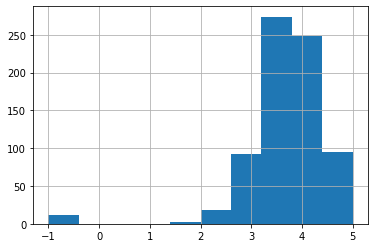

In [240]:
df.Rating.hist() #pretty close to normal distribution

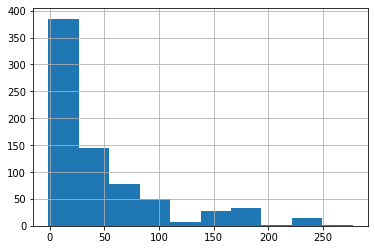

In [241]:
df.age.hist()

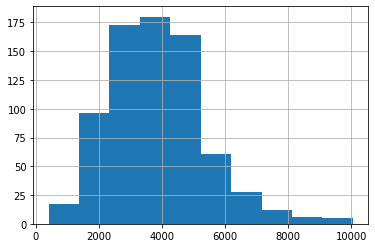

In [242]:
df.desc_len.hist() #normal distribution

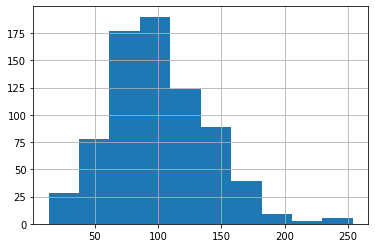

In [243]:
df.avg_salary.hist()

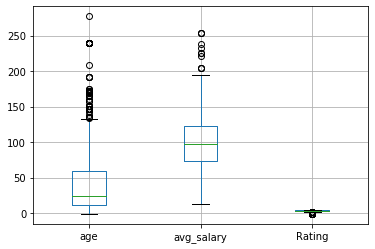

In [244]:
df.boxplot(column=['age','avg_salary','Rating'])

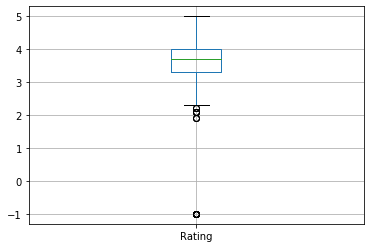

In [245]:
df.boxplot(column=['Rating'])

In [246]:
#coorections
df[['age','avg_salary','Rating','desc_len']].corr()

,age,avg_salary,Rating,desc_len
age,1.000000,0.019574,0.023162,0.164188
avg_salary,0.019574,1.000000,0.013492,0.078808
Rating,0.023162,0.013492,1.000000,-0.012281
desc_len,0.164188,0.078808,-0.012281,1.000000


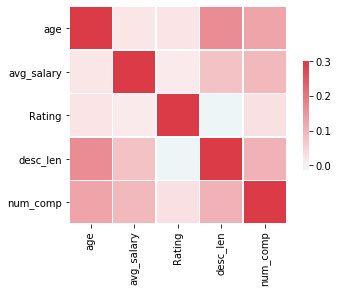

In [247]:
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating','desc_len','num_comp']].corr(),vmax=.3,center=0,cmap=cmap,
            square=True,linewidths=.5,cbar_kws={"shrink": .5})

In [248]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'Employer Provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python', 'R', 'spark',
       'aws', 'excel', 'job_simp', 'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [249]:
#categorical_data
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue','company_txt', 'job_state', 
            'python', 'R', 'spark', 'aws', 'excel', 'job_simp', 'seniority']]

graph for Location: total = 200


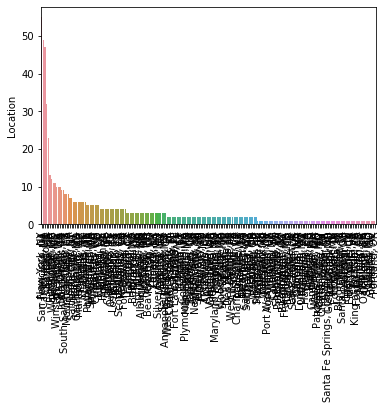

graph for Headquarters: total = 198


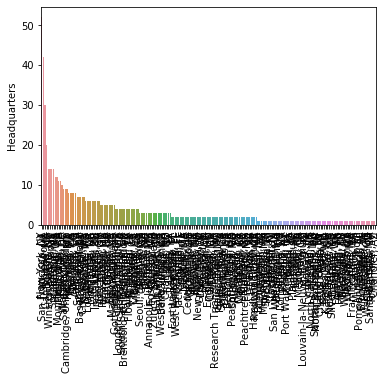

graph for Size: total = 9


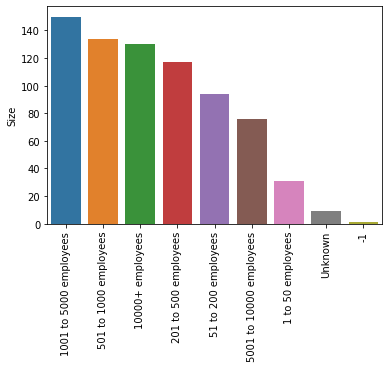

graph for Type of ownership: total = 11


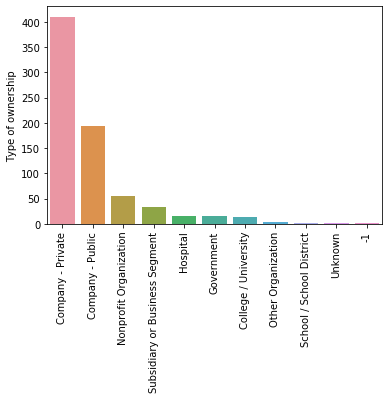

graph for Industry: total = 60


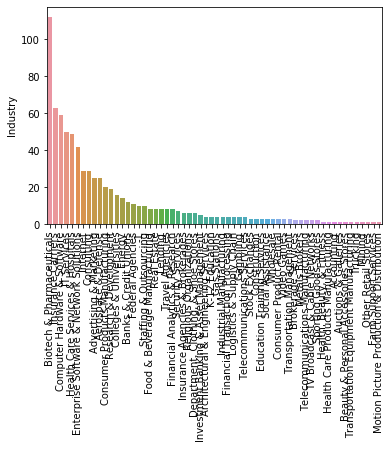

graph for Sector: total = 25


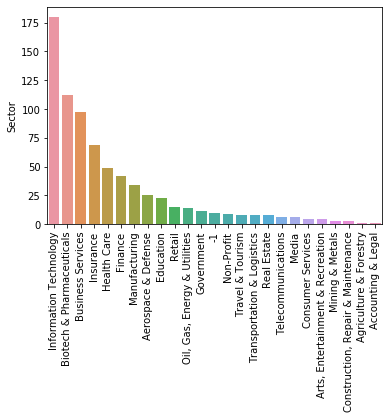

graph for Revenue: total = 14


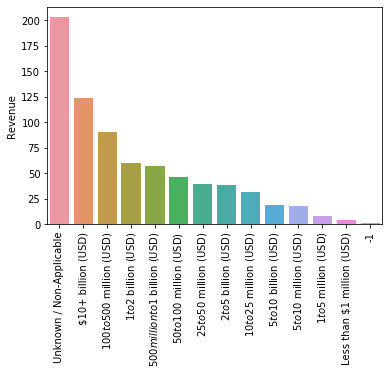

graph for company_txt: total = 343


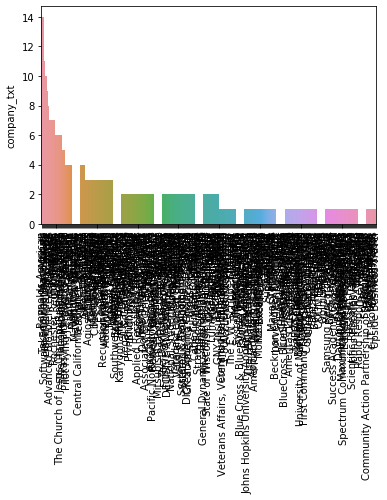

graph for job_state: total = 37


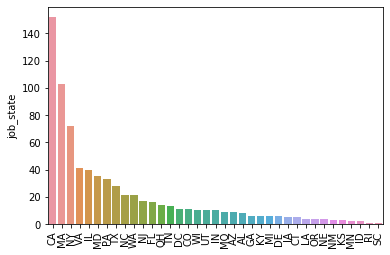

graph for python: total = 2


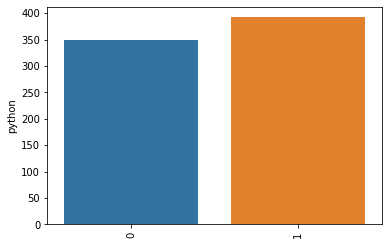

graph for R: total = 1


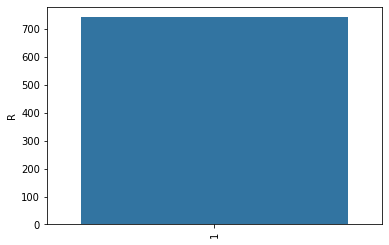

graph for spark: total = 2


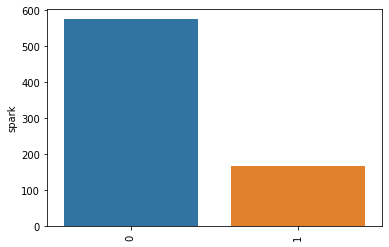

graph for aws: total = 2


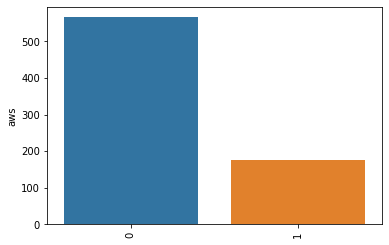

graph for excel: total = 2


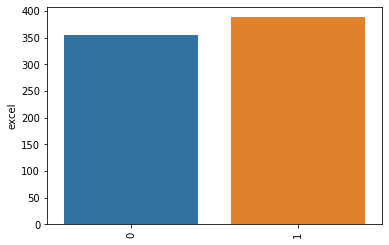

graph for job_simp: total = 7


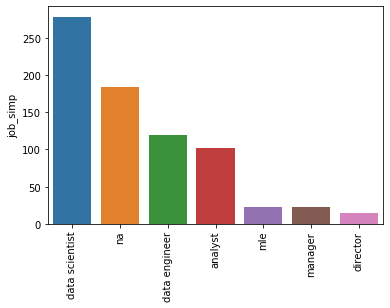

graph for seniority: total = 3


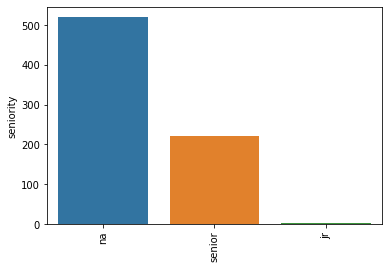

In [250]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i,len(cat_num))) #string formating
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90) #changing labels horizontal
    plt.show()

graph for Location: total = 20


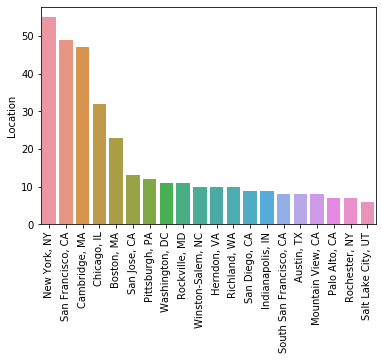

graph for Headquarters: total = 20


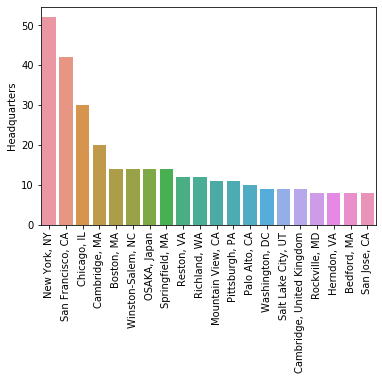

graph for company_txt: total = 20


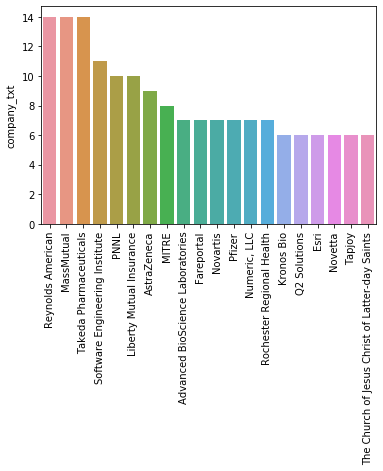

In [251]:
#top 20 in details with long items
for i in df_cat[['Location','Headquarters','company_txt']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i,len(cat_num))) #string formating
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90) #changing labels horizontal
    plt.show()

In [252]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'Employer Provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python', 'R', 'spark',
       'aws', 'excel', 'job_simp', 'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [253]:
pd.pivot_table(df,index = 'job_simp',values = 'avg_salary')
#directors are making more avg salary while analyst are making less 

,avg_salary
job_simp,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
manager,84.022727
mle,126.431818
na,84.853261


In [254]:
pd.pivot_table(df,index = ['job_simp','seniority'],values = 'avg_salary')

avg_salary
job_simp       seniority            
analyst        jr          56.500000
               na          61.155405
               senior      79.092593
data engineer  na          96.701220
               senior     124.689189
data scientist jr         106.500000
               na         107.043011
               senior     138.956522
director       na         168.607143
manager        na          84.022727
mle            na         119.133333
               senior     142.071429
na             na          73.988189
               senior     109.061404

In [255]:
pd.pivot_table(df,index = 'job_state',values = 'avg_salary').sort_values('avg_salary',ascending = False)

,avg_salary
job_state,
CA,123.513158
IL,116.662500
DC,110.181818
MA,106.281553
NJ,104.558824
MI,100.250000
RI,100.000000
NY,98.652778
NC,98.452381


In [256]:
pd.pivot_table(df,index = ['job_state','job_simp'],values = 'avg_salary',aggfunc = 'count').sort_values('job_state',ascending = False)


avg_salary
job_state job_simp                  
WI        na                       4
          data scientist           3
          analyst                  3
WA        na                       1
          data scientist          17
          analyst                  3
VA        na                       5
          mle                      2
          data scientist          18
          data engineer           10
          analyst                  6
UT        data engineer            3
          analyst                  4
          data scientist           3
TX        na                       7
          data scientist          13
          data engineer            8
TN        data scientist           1
          data engineer           10
          analyst                  2
SC        na                       1
RI        analyst                  1
PA        manager                  3
          data engineer            1
          data scientist           6
          analyst                  8
          mle                      7
          na                       8
OR        data scientist           3
          data engineer            1
OH        na                       3
          data scientist           7
          analyst                  4
NY        na                      12
          mle                      2
          data scientist          40
          data engineer            4
          analyst                 14
NM        data scientist           3
NJ        data scientist           4
          analyst                  6
          data engineer            2
          manager                  2
          director                 2
          na                       1
NE        na                       4
NC        na                      12
          data scientist           3
          data engineer            6
MO        na                       3
          manager                  1
          data scientist           3
          analyst                  2
MN        data engineer            1
          analyst                  1
MI        manager                  2
          data scientist           4
MD        na                      16
          data scientist          13
          data engineer            3
          analyst                  3
MA        na                      46
          manager                  5
          director                 6
          data scientist          30
          data engineer           12
          analyst                  4
LA        analyst                  1
          data engineer            2
          na                       1
KY        na                       4
          data scientist           2
KS        mle                      3
IN        na                       4
          data scientist           2
          data engineer            4
IL        analyst                  3
          na                       6
          mle                      2
          director                 6
          data scientist          15
          data engineer            8
ID        analyst                  2
IA        analyst                  2
          data engineer            3
GA        data scientist           3
          na                       3
FL        data scientist           7
          data engineer            3
          analyst                  6
DE        na                       6
DC        data scientist           5
          data engineer            4
          analyst                  2
CT        na                       3
          data scientist           2
CO        mle                      1
          data engineer            3
          analyst                  1
          na                       3
          data scientist           3
CA        na                      27
          mle                      5
          manager                  9
          data scientist          68
          data engineer           25
          analyst             

In [257]:
#full dataset
pd.set_option('display.max_rows',None)

In [258]:
#filter for only data scientist
pd.pivot_table(df[df.job_simp == 'data scientist'],index = ['job_state'],values = 'avg_salary').sort_values('avg_salary',ascending = False)


,avg_salary
job_state,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [259]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'Employer Provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python', 'R', 'spark',
       'aws', 'excel', 'job_simp', 'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [260]:
#rating, industry,sector,revenue,number of comp, hourly, employer provided, python,r , spark, aws, desc_len,type of ownership

In [261]:
df_pivots = df[['Rating','Industry', 'Sector', 'Revenue','num_comp','Employer Provided', 'python', 'R', 'spark','aws','desc_len','Type of ownership','avg_salary']]

In [262]:
#multiple_pivote table
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index = i, values = 'avg_salary').sort_values('avg_salary',ascending = False)) 

Rating
        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
Industry
                                          avg_salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services            

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [263]:
#company revenue if looking for python jobs pivot
pd.pivot_table(df_pivots, index = 'Revenue', columns= 'python',values = 'avg_salary', aggfunc= 'count')

python,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0


In [264]:
#word cloud
from wordcloud import WordCloud,ImageColorGenerator,STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


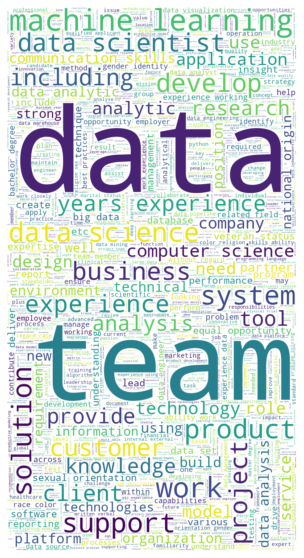

In [266]:
#words = " ".join(kobe_data.text.drop_duplicates())
words = " ".join(df['Job Description'])


def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text  = " ".join([ele for ele in words_filtered])

wc = WordCloud(background_color="white", random_state=1,  stopwords=STOPWORDS, max_words = 2000,width = 800,height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()
